In [ ]:
## This is a series of examples demonstrating the use of the icanswim/cosmosis repo 
## for data science and machine learning projects.
## This repo is intended to be used as the boiler plate for data science and machine learning projects.
## See the icanswim/qchem repo for a demonstration of the use of this (icanswim/cosmosis) repo.

In [1]:
from model import FFNet, tv_model, IdentityModel, GPT
from learning import Learn, Selector, Metrics
from dataset import CDataset, SKDS, TVDS, ExampleDataset
from dataset import ImageDatasetStats, AsTensor, SqueezeN, DType, Pad1d, EmbedLookup, Reshape

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

import numpy as np


In [ ]:
#Cosmosis blank parameters

lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
ds_param = {'train_param': {'input_dict': {'X': ['feature_1','feature_2'],
                                           'feature_3': ['feature_3']},
                            'transforms': {'feature_1': [ExampleTransform(10), AsTensor()],
                                           'feature_2': [Reshape(-1), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()]},
                            'boom': 'bang'}}

model_param = {'some_param': 128,
               'X': None,
               'y': 'y',
               'embed_param': {'feature_3': (voc,vec,padding_idx,trainable),
                               'some_param': True,
                               'flatten': True}} 
                                       
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .005} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([DS], 
              Model,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Optimizer, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=LossFunction,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=12, epochs=1, gpu=True)


In [2]:
#example cosmosis dataset (CDataset)

class ExampleTransform():
    def __init__(self, num):
        self.num = num
        
    def __call__(self, arr):
        return np.add(arr, self.num)


class ExampleDataset(CDataset):
    #zero is the lookup for the padding index 
    embed_lookup = {'feature_4': {'a': 1,'b': 2,'c': 3,'d': 4, '0': 0},
                    'feature_3': {'z1': 1, 'y1': 2, 'x1': 3, '0': 0},
                    'feature_6': {'e': 1, 'f': 2, 'g': 3, '0': 0}}
    
    def load_data(self, boom='bust'):
        
        datadic = {1: {'feature_1': np.asarray([.04]),
                       'feature_2': np.asarray([[.02,.03],[.04,.05]]),
                       'feature_3': np.asarray(['z1']),
                       'feature_4': np.asarray(['c','c','d']),
                       'feature_5': np.asarray([1.1]),
                       'feature_6': np.asarray(['e','f','g'])},
                   2: {'feature_1': np.asarray([.03]),
                       'feature_2': np.asarray([[.1,.2],[.3,.4]]),
                       'feature_3': np.asarray(['x1','z1','y1']),
                       'feature_4': np.asarray(['d','a','d']),
                       'feature_5': np.asarray([1.2]),
                       'feature_6': np.asarray(['f','f','g'])}}
        
        print(boom)
        return datadic
    
lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
lookup_feature_6 = ExampleDataset.embed_lookup['feature_6']
ds_param = {'train_param': {'input_dict': {
                                           'X2': ['feature_1','feature_2'], 
                                           'X3': ['feature_2'],
                                           'embed_3': ['feature_3'],
                                           'embed_4': ['feature_4'],
                                           'target': ['feature_5'],
                                            },
                            'transforms': {'feature_1': [ExampleTransform(10), Reshape((-1)), AsTensor()],
                                           'feature_2': [Reshape((-1)), AsTensor()],
                                           'feature_3': [Pad1d(5), EmbedLookup(lookup_feature_3), AsTensor()],
                                           'feature_4': [Pad1d(5), EmbedLookup(lookup_feature_4), AsTensor()],
                                           'feature_5': [AsTensor()],
                                           'feature_6': [Pad1d(5), EmbedLookup(lookup_feature_6), AsTensor()]},
                            'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
               'X': ['X2', 'X3'],
               'y': 'target',
               'embed_param': {'embed_3': (4,8,0,False),
                               'embed_4': (5,8,0,False),
                               'flatten': True}
              }

im = IdentityModel(model_param)
print(im)
print('embedding_layer: ', im.embedding_layer)

out = im(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) # (1+4+4+5*8+5*8) = 89


bang
CDataset created...
ed[1]:  {'X2': tensor([10.0400,  0.0200,  0.0300,  0.0400,  0.0500], dtype=torch.float64), 'X3': tensor([0.0200, 0.0300, 0.0400, 0.0500], dtype=torch.float64), 'embed_3': tensor([1, 0, 0, 0, 0]), 'embed_4': tensor([3, 3, 4, 0, 0]), 'target': tensor([1.1000], dtype=torch.float64)}
CModel loaded...
IdentityModel(
  (layers): ModuleList(
    (0): Identity()
  )
)
embedding_layer:  {'embed_3': Embedding(4, 8, padding_idx=0), 'embed_4': Embedding(5, 8, padding_idx=0)}
out:  tensor([ 1.0040e+01,  2.0000e-02,  3.0000e-02,  4.0000e-02,  5.0000e-02,
         2.0000e-02,  3.0000e-02,  4.0000e-02,  5.0000e-02, -1.3216e+00,
         1.4602e+00,  1.8510e-01,  1.1835e-01,  1.6951e-01,  1.2549e+00,
        -9.4399e-01,  2.4301e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.

In [3]:
#example showing transformer inputs, outputs and parameters
#example sequence translation using GPT like decoder only transformer model

lookup_feature_3 = ExampleDataset.embed_lookup['feature_3']
lookup_feature_4 = ExampleDataset.embed_lookup['feature_4']
ds_param = {'train_param': {'input_dict': {'X1': ['feature_3'], # target
                                           'X2': ['feature_4']},
                            'transforms': {'feature_3': [Pad1d(6), EmbedLookup(lookup_feature_3), AsTensor()],
                                           'feature_4': [Pad1d(6), EmbedLookup(lookup_feature_4), AsTensor()]},
                              'boom': 'bang'}}
    
ed = ExampleDataset(**ds_param['train_param'])
print('ed[1]: ', ed[1])

model_param = {'device': 'cpu',
               'd_model': 8, # matches embedding dimension
               'n_head': 2, 
               'num_layers': 2,
               'd_vocab': 4, # determines the linear_head dim
               'linear_head': True,
               'probs': True, # returns normalized probs or logits
               'tokens': True, # returns tokens
               'transpose': False,
               'embed_param': {'X1': (4,8,0,True), # embed key matches input_dict key ('X1')
                               'X2': (5,8,0,True), # vector dimension matches d_model dimension
                } 
              }                                  
                 
                                 
gpt = GPT(model_param)
print(gpt)
print('embedding_layer: ', gpt.embedding_layer)
out = gpt(ed[1])
print('out: ', out)
print('out.shape: ', out.shape) 
# (feature_length, embedding_lenth) x (linear_head, d_vocab) = (6, 8) x (8, 4) = (6 x 4)

inverse_lookup_feature_3 = {v: k for k, v in lookup_feature_3.items()}
for generated_token in out.squeeze().tolist():
    generated_symbol = inverse_lookup_feature_3[generated_token]
    print(generated_symbol)

inverse_lookup_feature_4 = {v: k for k, v in lookup_feature_4.items()}
for prompt_token in ed[1]['X2'].tolist():
    symbol = inverse_lookup_feature_4[prompt_token]
    print(symbol)
    
                        

bang
CDataset created...
ed[1]:  {'X1': tensor([1, 0, 0, 0, 0, 0]), 'X2': tensor([3, 3, 4, 0, 0, 0])}
CModel loaded...
GPT(
  (linear_head): Sequential(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (layers): ModuleList(
    (0): TransformerDecoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
          )
          (linear1): Linear(in_features=8, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=8, bias=True)
          (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((8,), eps=1e-

In [3]:
#example cosmosis sklearn regression dataset wrapper (SKDS)
                            
ds_param = {'train_param': {'input_dict': {'model_input': ['X'],
                                           'y': ['y']},
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples': 100,
                                         'n_features': 5},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32'}}

sk = SKDS(**ds_param['train_param'])

sk[1]


creating scikit learn make_regression dataset...
CDataset created...


{'model_input': array([ 0.72412384,  0.5569243 ,  0.88534963, -1.462532  ,  0.5514815 ],
       dtype=float32),
 'y': array([37.03814], dtype=float32)}

In [4]:
#example cosmosis sklearn classification dataset wrapper (SKDS)
ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [AsTensor()],
                                           'X': [AsTensor()]},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 1000,
                                         'n_features': 30,
                                         'n_informative': 20,
                                         'n_clusters_per_class': 3,
                                         'flip_y': 0.05,
                                         'class_sep': 0.1,
                                         'n_classes': 4}}}

sk = SKDS(**ds_param['train_param'])

print(sk[1])


creating scikit learn make_classification dataset...
CDataset created...
{'X': tensor([ 4.1079e+00, -1.5082e-02,  1.4617e+00,  4.1152e+00,  3.8492e+00,
         1.9575e-04,  2.9881e-01,  2.6957e+00,  4.2629e+00, -8.5533e-01,
        -4.7858e+00,  2.1245e-01, -5.0862e+00, -6.3217e-01,  1.8845e+01,
        -2.2385e+00, -3.2960e+00, -6.8710e+00,  2.4607e-02, -6.1007e-01,
        -3.7444e+00, -5.4955e-01, -1.0630e+00, -4.7831e+00,  1.1714e+00,
        -5.2465e-01,  2.9883e+00,  2.5938e+00, -4.8920e+00,  9.4576e-02]), 'y': tensor([1])}


In [5]:
#example cosmosis torchvision image dataset wrapper (TVDS)
ds_param = {'train_param': {'input_dict': {'features': ['images'],
                                           'y': ['labels']},
                            'dataset': 'MNIST',
                            'tv_param': {'root': './data/',
                                         'train': True,
                                         'download': True,
                                         'transform': transforms.Compose([transforms.Resize(224)]),
                                         'target_transform': None}}}

tvds = TVDS(**ds_param['train_param'])
tvds[1]


creating torch vision MNIST dataset...
CDataset created...


{'image': <PIL.Image.Image image mode=L size=224x224>, 'y': 0}

In [7]:
#example cosmosis torchvision image dataset wrapper (TVDS) with transforms and PIL stats
ds_param={'dataset': 'MNIST',
          'tv_param': {'root': './data/',
                       'train': True,
                       'download': True,
                       'transform': transforms.Compose([transforms.Resize(224)]),
                       'target_transform': None}}

tvds = TVDS(**ds_param)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

creating torch vision MNIST dataset...
CDataset created...
images to process: 60000
images processed: 10000
images processed: 20000
images processed: 30000
images processed: 40000
images processed: 50000
images processed: 60000
mean: [33.33091590401786], stddev: [73.70246726596685]
mean:  [33.33091590401786]
stddev:  [73.70246726596685]


creating scikit learn make_regression dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...

.....................

total elapsed time: 0:00:10.104626
epoch: 19
y_pred:  tensor([-2391.9944], device='cuda:0', grad_fn=<SelectBackward0>)
y:  tensor([-2678.5830], device='cuda:0')
train loss: 1240815.8103027344, val loss: 251665.283203125
lr: 0.01
early stopping!  learning rate is below the set minimum...

........final........

total learning time: 0:00:17.583689
test loss: 272488.9431152344


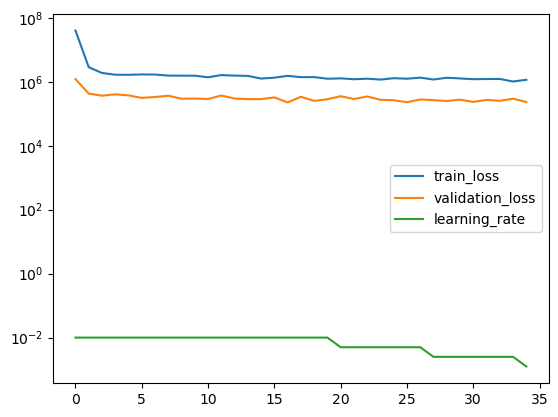

In [6]:
#example cosmosis sklearn regression dataset wrapper (SKDS) with sklearn metrics (Metrics) and 
#custom model (FFNet)
model_param = {'in_channels': 256, 
                'hidden': 512, 
                'out_channels': 1, 
                'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'float32',
                            'dataset': 'make_regression',
                            'sk_param': {'n_samples':20000,
                                         'n_features': 256,
                                         'n_informative': 200}}}
             
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .00125} #break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 3,
               'cooldown': 3}

learn = Learn([SKDS], 
              FFNet,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=MSELoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=128, epochs=50, gpu=True)


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...

.....................

total elapsed time: 0:00:11.472792
epoch: 3
y_pred:  tensor([-1.2611, -0.1166, -0.0108,  0.9086], device='cuda:0',
       grad_fn=<SelectBackward0>)
y:  tensor(3, device='cuda:0')
train loss: 4.987863454967737, val loss: 1.107040511444211
lr: 0.01
accuracy_score train score: 0.46118074633699635, validation score: 0.437767094017094

.....................

total elapsed time: 0:00:22.982030
epoch: 7
y_pred:  tensor([-0.7579,  1.1643,  0.6504, -3.0597], device='cuda:0',
       grad_fn=<SelectBackward0>)
y:  tensor(2, device='cuda:0')
train loss: 3.8850813629105687, val loss: 0.9042636607773602
lr: 0.01
accuracy_score train score: 0.6011618589743589, validation score: 0.5583600427350427

.....................

total elapsed time: 0:00:34.450114
epoch: 11
y_pred:  tensor([ 1.0784, -1.0341, -0.3223,  0.0230], device='cuda:0',
       g

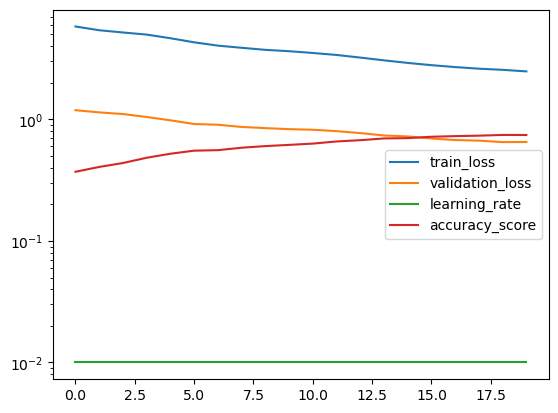

In [7]:
#example cosmosis sklearn classification dataset wrapper (SKDS) with sklearn metrics (Metrics) and 
#custom model (FFNet)
model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 300,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'metric_name': 'accuracy_score', #sklearn
                 'metric_param': {}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learm = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              adapt=(300,256,.2), batch_size=128, epochs=20, 
              save_model='demo_model')


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
running model on gpu...

.....................

total elapsed time: 0:00:11.095716
epoch: 3
y_pred:  tensor([ 0.3385, -0.2048,  0.1891, -0.4258], device='cuda:0',
       grad_fn=<SelectBackward0>)
y:  tensor(3, device='cuda:0')
train loss: 5.044312772341073, val loss: 1.1211577877402306
lr: 0.01
multiclass_accuracy train score: 0.4527815878391266, validation score: 0.4231437146663666

.....................

total elapsed time: 0:00:22.421586
epoch: 7
y_pred:  tensor([ 0.7733, -0.7710,  0.6495, -1.2480], device='cuda:0',
       grad_fn=<SelectBackward0>)
y:  tensor(0, device='cuda:0')
train loss: 3.837669533211738, val loss: 0.9020965280942619
lr: 0.01
multiclass_accuracy train score: 0.6336137652397156, validation score: 0.5892761945724487

.....................

total elapsed time: 0:00:34.312045
epoch: 11
y_pred:  tensor([-0.2813, -1.8359,  1.6327, -0.2518], device='cuda:0'

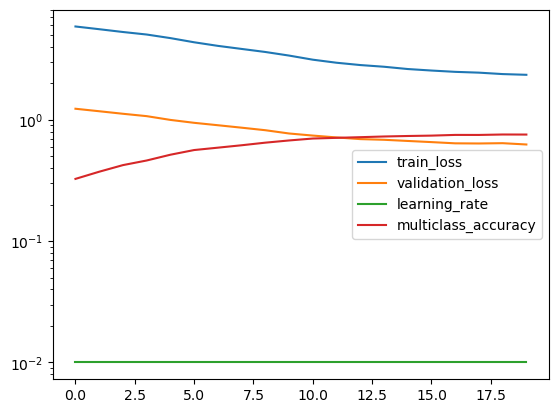

In [8]:
# example using on GPU torcheval metrics

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4,
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'transforms': {'y': [SqueezeN()],
                                           'X': []},
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 100000,
                                         'n_features': 300,
                                         'n_informative': 200,
                                         'n_redundant': 5,
                                         'n_repeated': 5,
                                         'n_clusters_per_class': 5,
                                         'flip_y': 0.05,
                                         'class_sep': 0.05,
                                         'n_classes': 4}}}
                                     
metrics_param = {'report_interval': 10,
                 'log_plot': True,
                 'metric_name': 'multiclass_accuracy', #torcheval
                 'metric_param': {'num_classes': 4}}

opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, 
              sample_param=sample_param, opt_param=opt_param, 
              sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param,
              adapt=(300,256,.2), batch_size=128, epochs=20, 
              save_model='demo_model')


In [9]:
#example inference with cosmosis sklearn classification dataset wrapper (SKDS) and custom model (FFNet)

model_param = {'in_channels': 256, 
               'hidden': 128, 
               'out_channels': 4, 
               'model_name': 'funnel'}

ds_param = {'train_param': {'input_dict': {'X': ['X'],
                                           'y': ['y']},
                            'features_dtype': 'float32',
                            'targets_dtype': 'int64',
                            'dataset': 'make_classification',
                            'sk_param': {'n_samples': 10000,
                                         'n_features': 300,
                                         'n_informative': 200,
                                         'n_clusters_per_class': 3,
                                         'flip_y': 0.05,
                                         'class_sep': 0.1,
                                         'n_classes': 4}}}
                                     
learn = Learn([SKDS], 
              FFNet, 
              Sampler=Selector,
              Metrics=Metrics,
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=None,
              model_param=model_param, ds_param=ds_param, 
              batch_size=128, epochs=2, load_model='demo_model.pth')


creating scikit learn make_classification dataset...
CDataset created...
FFNet model loaded...
CModel loaded...
model loaded from pickle...
running model on gpu...

.....................

total learning time: 0:00:00.321889
self.predictions[-1]:  [-0.03713424  0.11496209 -1.355185    0.81965417]
self.predictions.shape:  (20000, 4)
inference 2025-01-24 10:05:17.342555 complete and saved to csv...


creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
creating torch vision CIFAR10 dataset...
Files already downloaded and verified
CDataset created...
torchvision model resnet18 loaded...
running model on gpu...

.....................

total elapsed time: 0:00:30.397338
epoch: 5
y_pred:  tensor([-1.5527, -1.6867,  0.5756,  0.6745, -0.0416,  1.0742,  1.2062,  0.1611,
        -3.0084, -0.9754], device='cuda:0')
y:  tensor(4, device='cuda:0')
train loss: 416.9118221998215, val loss: 104.23561549186707
lr: 0.01
roc_auc_score train score: 0.8304143228518053, validation score: 0.8464680781603645

........final........

total learning time: 0:00:56.594388
test loss: 931.2267460227013
roc_auc_score test metric: 0.8733910444444444


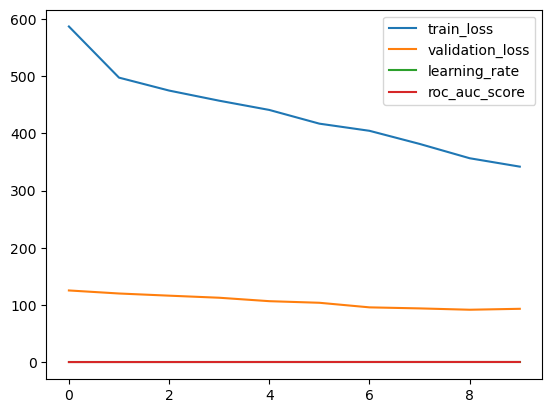

In [10]:
#example cosmosis torchvision image dataset wrapper (TVDS) with transforms and 
#torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnet18',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(64),
                                                           transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'download': True,
                                       'transform': transforms.Compose([
                                                         transforms.Resize(64),
                                                         transforms.ToTensor()]),
                                       'target_transform': None,
                                       'download': True}}}

metrics_param = {'report_interval': 30, 
                 'metric_name': 'roc_auc_score', 
                 'metric_param': {'average': 'macro',
                                  'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 1,
               'cooldown': 1}

learn = Learn([TVDS,TVDS], 
              tv_model, 
              Selector, 
              Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
              model_param=model_param, ds_param=ds_param, sample_param=sample_param, 
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=16, epochs=10)

creating torch vision CIFAR10 dataset...
CDataset created...
creating torch vision CIFAR10 dataset...
CDataset created...
torchvision model resnext50_32x4d loaded...
running model on gpu...

...........................
learning time: 0:01:05.147665
epoch: 0, lr: 0.01
train loss: 2.5674985399246215, val loss: 2.072288857352349

last targets: 
[4 8 8 5 5]

last predictions: 
[[0.07278122 0.14399211 0.07370973 ... 0.11020724 0.09185917 0.11255028]
 [0.01910913 0.05766986 0.08401669 ... 0.13554628 0.02359482 0.05072202]
 [0.0426407  0.14339124 0.06614842 ... 0.11613528 0.06407788 0.10988762]
 ...
 [0.40786144 0.10521875 0.03512064 ... 0.02700499 0.28703937 0.07597713]
 [0.03897474 0.1277065  0.06919663 ... 0.11989995 0.0569594  0.1019728 ]
 [0.02523606 0.05075788 0.09442572 ... 0.13529946 0.02689966 0.04796572]]

roc_auc_score train score: 0.6063433975820386, validation score: 0.7021178663628574

...........................
learning time: 0:02:08.900400
epoch: 1, lr: 0.01
train loss: 2.066

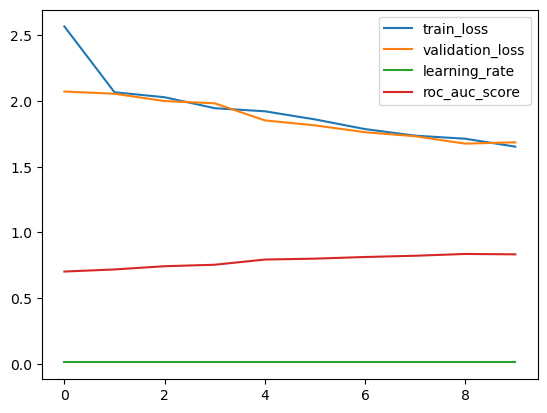

In [2]:
#example cosmosis torchvision dataset wrapper (TVDS) with transforms and 
#torchvision model wrapper (tv_model)
model_param = {'model_name': 'resnext50_32x4d',
               'in_channels': 3,
               'tv_param': {'num_classes': 10}}

ds_param={'train_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': True,
                                       'transform': transforms.Compose([
                                                    transforms.RandomRotation(10),
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}},
           'test_param': {'dataset': 'CIFAR10',
                          'tv_param': {'root': './data/',
                                       'train': False,
                                       'transform': transforms.Compose([
                                                    transforms.Resize(256),
                                                    transforms.ToTensor()]),
                                       'target_transform': None}}}

metrics_param = {'report_interval': 60, 
                 'metric_name': 'roc_auc_score', 
                 'metric_param': {'average': 'macro',
                                  'multi_class': 'ovr'}}

opt_param = {'lr': 0.01}

crit_param = {'reduction': 'sum'}

sample_param = {'set_seed': 88,
                'splits': (.8,),
                'subset': .1}

sched_param = {'factor': .5,
               'patience': 2,
               'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_param=model_param, ds_param=ds_param, 
          sample_param=sample_param, opt_param=opt_param, 
          sched_param=sched_param, crit_param=crit_param,
          metrics_param=metrics_param,
          batch_size=16, epochs=10)